In [6]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [1]:
#importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

#to enhance the display quality of inline visualizations (plots)
%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

#to ignore the warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset from the csv file into a dataframe.
data=pd.read_csv('Dataset/telecom_customer_churn.csv')
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [62]:
#to check for the number of rows and columns.
data.shape

(7043, 38)

In [3]:
#to check for the categorical features in dataset.
data_category=data.select_dtypes(include=['object'])
data_category.describe().T

,count,unique,top,freq
Customer ID,7043,7043,9995-HOTOH,1
Gender,7043,2,Male,3555
Married,7043,2,No,3641
City,7043,1106,Los Angeles,293
Offer,3166,5,Offer B,824
Phone Service,7043,2,Yes,6361
Multiple Lines,6361,2,No,3390
Internet Service,7043,2,Yes,5517
Internet Type,5517,3,Fiber Optic,3035
Online Security,5517,2,No,3498


In [64]:
#to check for the numerical category in dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,37.680000,49.990000
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


In [65]:
#list all the columns in dataset.
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

1)Exploratory Data Analysis (EDA)

In [4]:
#to remove unncesaary columns from the dataset. Dimensionality reduction.
data.drop(columns=['Customer ID','Zip Code','City', 'Latitude', 'Longitude','Churn Category', 'Churn Reason','Total Refunds'],axis=1,inplace=True)
data.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,NaN,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,NaN,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,NaN,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0,22.14,289.54,Churned


In [14]:
#information about each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              3166 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  6361 non-null   float64
 9   Multiple Lines                     6361 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [5]:
##to determine the correlation between the data columns.
data_numeric = data.select_dtypes(include=['int64', 'float64'])
data_numeric.columns

Index(['Age', 'Number of Dependents', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

Age                                      Avg Monthly GB Download
Number of Dependents                     Avg Monthly GB Download
Number of Referrals                             Tenure in Months
Tenure in Months                                   Total Revenue
Avg Monthly Long Distance Charges    Total Long Distance Charges
Avg Monthly GB Download                                      Age
Monthly Charge                                     Total Charges
Total Charges                                      Total Revenue
Total Extra Data Charges                           Total Revenue
Total Long Distance Charges                        Total Revenue
Total Revenue                                      Total Charges
dtype: object

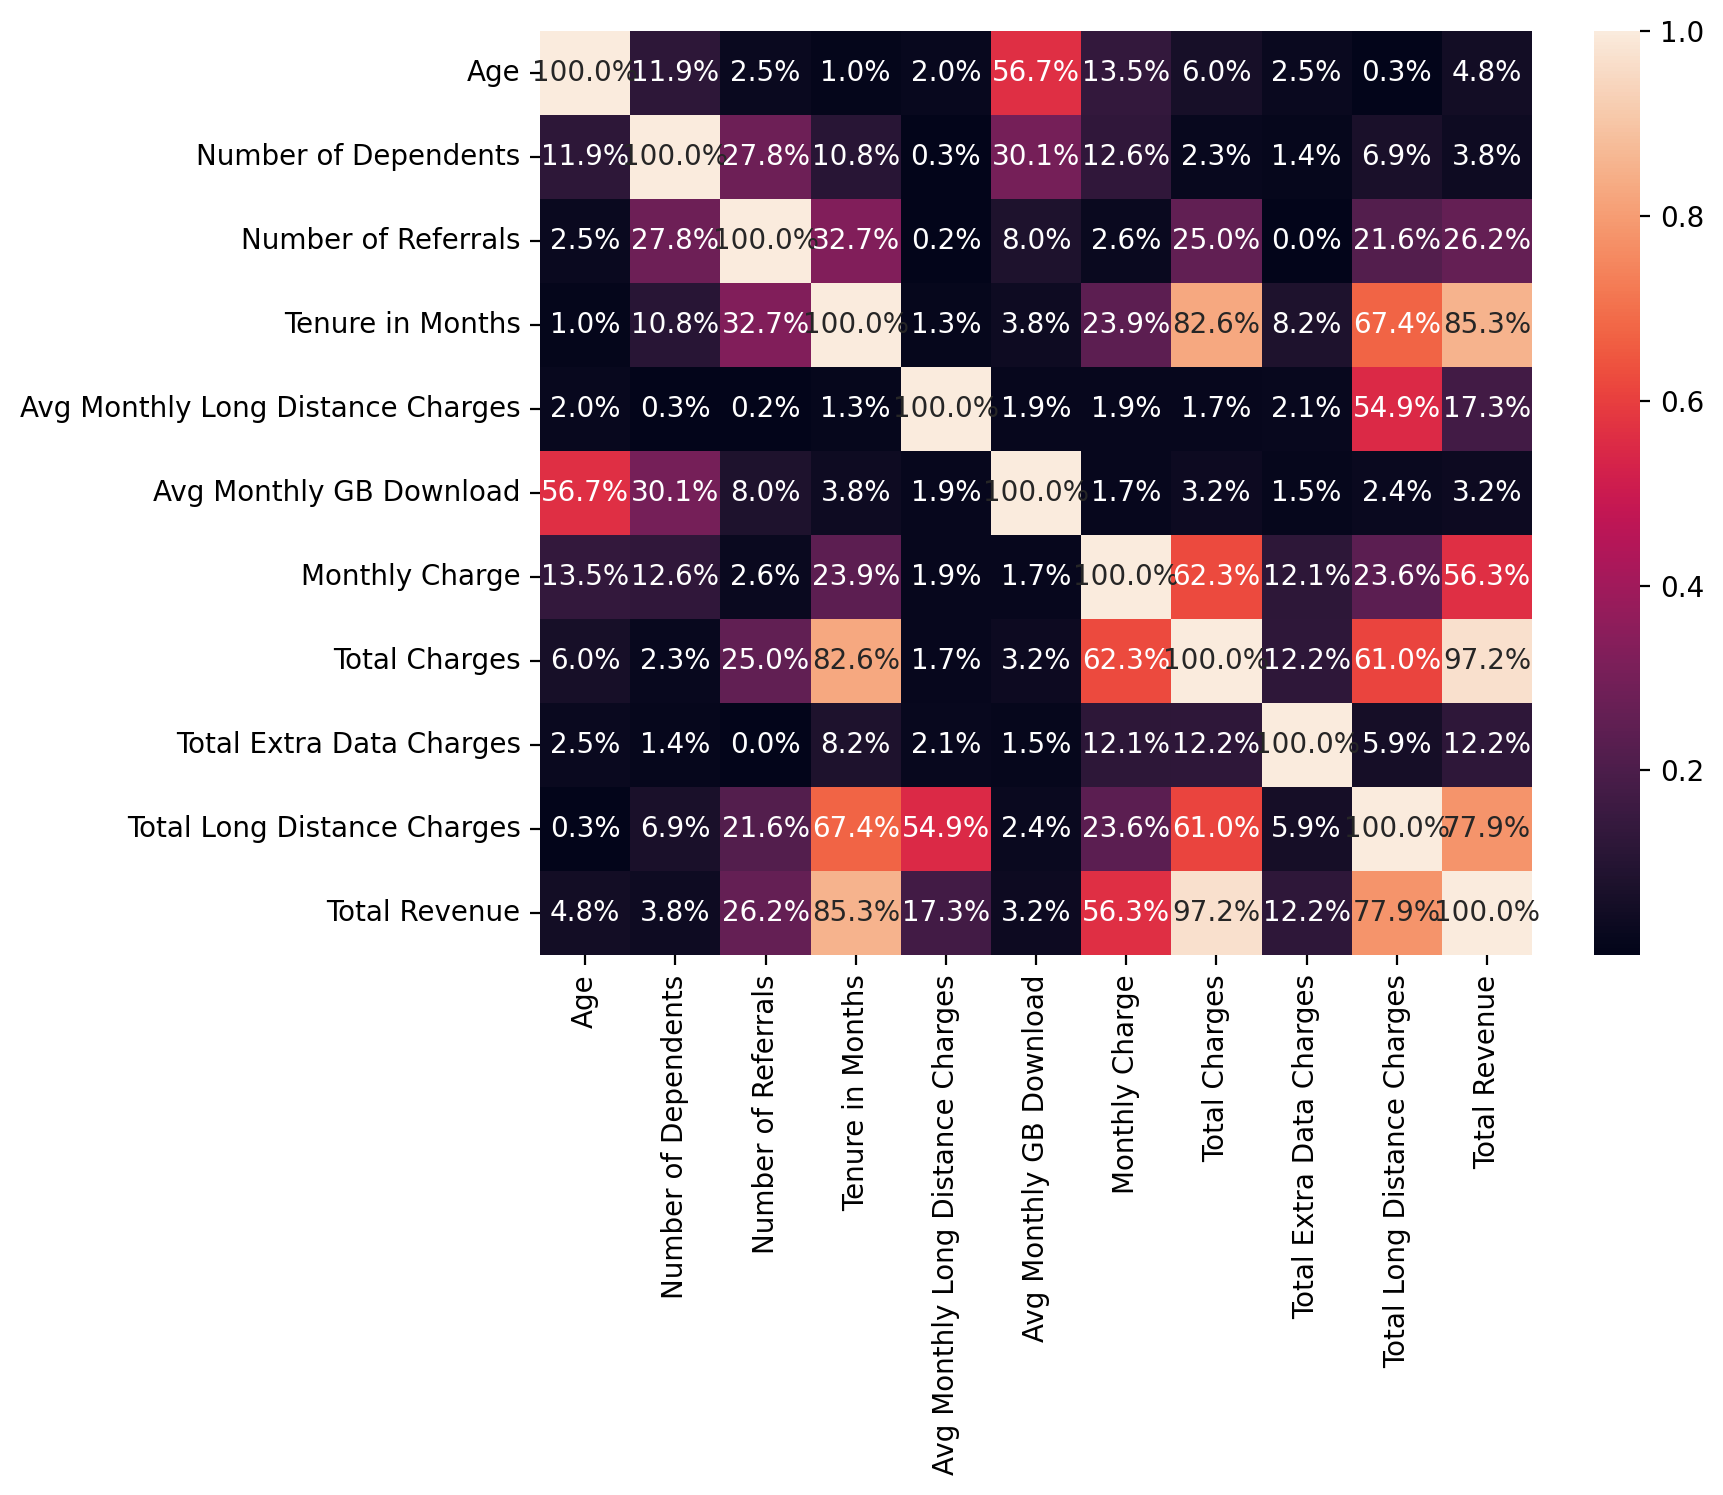

In [6]:
#heat map
#find correlation between the numerical data types.
corr_mat = data_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat.abs(), annot=True, fmt=".1%")
#shows dependencies between the columns.
for x in range(len(data_numeric.columns)):
  corr_mat.iloc[x,x] = 0.0
corr_mat.abs().idxmax()

In [7]:
##observation states that the total revenue and total charges are dependent. so remove either of them.
data.drop('Total Revenue',axis=1,inplace=True)

In [8]:
#check if the columns have null value.
data.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                       0
Payment Method                    

In [9]:
# Count how many rows have 'Yes' in 'Internet Service'
count_yes = data[data['Internet Service'] == 'No'].shape[0]
print(f"Number of rows with 'Internet Service' as 'Yes': {count_yes}")

Number of rows with 'Internet Service' as 'Yes': 1526


In [10]:
# Define the column names
column_name = ['Premium Tech Support','Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
# Apply the condition using a vectorized approach
data[column_name] = data['Internet Service'].apply(
    lambda x: ['Yes'] * len(column_name) if x == 'Yes' else ['No'] * len(column_name)
).apply(pd.Series)


In [11]:
#fill missing values of numerical column using knnimputer.
knn_imputer=KNNImputer(n_neighbors=5)
data['Avg Monthly GB Download']=knn_imputer.fit_transform(data[['Avg Monthly GB Download']].round(2))
data['Avg Monthly Long Distance Charges']=knn_imputer.fit_transform(data[['Avg Monthly Long Distance Charges']].round(2))

In [12]:
#fill missing values for categorical data.Using for loop
columns=['Offer','Multiple Lines','Internet Type','Online Security', 'Online Backup', 'Device Protection Plan']
for col in columns:
    data[col].fillna(data[col].mode()[0],inplace=True)
    print(data[col].unique())

['Offer B' 'Offer E' 'Offer D' 'Offer A' 'Offer C']
['No' 'Yes']
['Cable' 'Fiber Optic' 'DSL']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']


In [13]:
#to determine unique fields in categorical values.
columns=['Offer','Gender','Married','Multiple Lines','Phone Service','Internet Type','Internet Service','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract'
,'Paperless Billing','Payment Method','Customer Status']
for col in columns:
    print(data[col].unique())
    

['Offer B' 'Offer E' 'Offer D' 'Offer A' 'Offer C']
['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Cable' 'Fiber Optic' 'DSL']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['One Year' 'Month-to-Month' 'Two Year']
['Yes' 'No']
['Credit Card' 'Bank Withdrawal' 'Mailed Check']
['Stayed' 'Churned' 'Joined']


In [14]:
from scipy.stats import chi2_contingency
#categorical Columns
categorical_columns = ['Offer', 'Gender', 'Married', 'Multiple Lines', 'Phone Service', 
                       'Internet Type', 'Internet Service', 'Online Security', 
                       'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 
                       'Streaming TV', 'Streaming Movies', 'Streaming Music', 
                       'Unlimited Data', 'Contract', 'Paperless Billing', 
                       'Payment Method']

dependent_variable = 'Customer Status'

# Dictionary to store results
chi2_results = []

for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data[dependent_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store results
    chi2_results.append({
        'Feature': column,
        'Chi-Square Statistic': chi2,
        'P-Value': p,
        'Degrees of Freedom': dof
    })

# Convert results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Add a significance column based on p-value
chi2_results_df['Significant'] = chi2_results_df['P-Value'] < 0.05

# Display the results
print(chi2_results_df.sort_values(by='P-Value'))


                   Feature  Chi-Square Statistic        P-Value  \
15                Contract           1987.364679   0.000000e+00   
0                    Offer            966.898491  2.080940e-203   
14          Unlimited Data            413.651833   1.501917e-90   
6         Internet Service            413.651833   1.501917e-90   
10    Premium Tech Support            413.651833   1.501917e-90   
12        Streaming Movies            413.651833   1.501917e-90   
11            Streaming TV            413.651833   1.501917e-90   
13         Streaming Music            413.651833   1.501917e-90   
2                  Married            394.153430   2.574365e-86   
17          Payment Method            369.454177   1.103876e-78   
7          Online Security            337.349863   5.564267e-74   
16       Paperless Billing            280.450945   1.261395e-61   
9   Device Protection Plan            219.269277   2.433781e-48   
3           Multiple Lines            208.455242   5.426493e-4

In [15]:
#from chi-Square test its noted that phone service and gender are not important.
data.drop(columns=['Phone Service','Gender'],inplace=True)

In [16]:
#labelencoder to convert categorical values to numerical values.
encoder=LabelEncoder()
columns=['Offer','Married','Multiple Lines','Internet Type','Internet Service','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract'
,'Paperless Billing','Payment Method','Customer Status']
for col in columns:
    data[col]=encoder.fit_transform(data[[col]])
    print(data[col].unique())

[1 4 3 0 2]
[1 0]
[0 1]
[0 2 1]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0]
[1 0 2]
[1 0]
[1 0 2]
[2 0 1]


In [17]:
#describe the numerical features
data.describe()

,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Customer Status
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.483033,0.468692,1.951867,32.386767,1.498935,25.420517,0.421837,0.783331,1.529746,26.189958,0.286668,0.344881,0.343888,0.783331,0.783331,0.783331,0.783331,0.783331,0.754792,0.592219,0.499645,63.596131,2280.381264,6.860713,749.099262,1.404799
std,16.750352,0.499748,0.962802,3.001199,24.542061,1.120080,13.495231,0.493888,0.412004,0.696333,17.334960,0.452237,0.475363,0.475038,0.412004,0.412004,0.412004,0.412004,0.412004,0.848468,0.491457,0.599483,31.204743,2266.220462,25.104978,846.660055,0.878514
min,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.010000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,18.800000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,9.000000,1.000000,14.455000,0.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.400000,400.150000,0.000000,70.545000,0.000000
50%,46.000000,0.000000,0.000000,0.000000,29.000000,1.000000,25.420517,0.000000,1.000000,2.000000,26.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,70.050000,1394.550000,0.000000,401.440000,2.000000
75%,60.000000,1.000000,0.000000,3.000000,55.000000,2.000000,36.395000,1.000000,1.000000,2.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,89.750000,3786.600000,0.000000,1191.100000,2.000000
max,80.000000,1.000000,9.000000,11.000000,72.000000,4.000000,49.990000,1.000000,1.000000,2.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,118.750000,8684.800000,150.000000,3564.720000,2.000000


In [18]:
#imbalanced dataset , indicating there are more stayed customer than the churned customer so biased accuracy.
data['Customer Status'].value_counts()

Customer Status
2    4720
0    1869
1     454
Name: count, dtype: int64

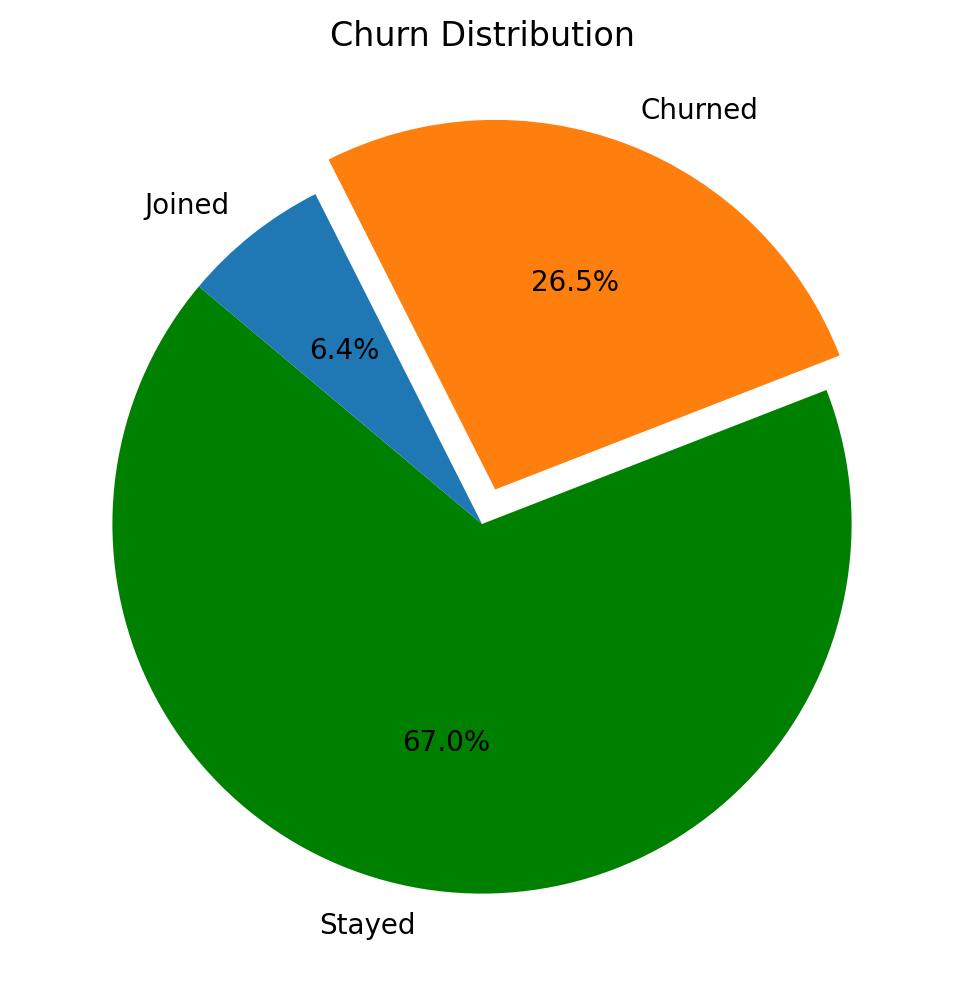

In [19]:
#pie plot to describe how many cutomers have churned and not churned.
churn_counts = data['Customer Status'].value_counts()

# Labels and colors for the pie chart
labels = ['Stayed', 'Churned','Joined']
colors = ['#008000', '#ff7f0e','#1f77b4']  # Blue for non-churners, orange for churners

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts,labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,explode=(0,0.1,0))
plt.title('Churn Distribution')
plt.show()

In [20]:
#split the dataset into train test dataset.
x=data.iloc[:,:-1] #independent features.
y=data.iloc[:,-1]  #dependent feature.


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [86]:
x_train.shape

(5634, 26)

In [87]:
y_train.shape

(5634,)

In [88]:
x_test.shape

(1409, 26)

In [22]:
#standarization
scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [32]:
#using random forest classifier on scaled dataset.without PCA and Bagging
model_random=RandomForestClassifier(n_estimators=30)
model_random.fit(x_train_scaled,y_train)
# Predictions on the test set
y_pred = model_random.predict(x_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8289567068843151
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       370
           1       0.74      0.62      0.67        97
           2       0.88      0.93      0.91       942

    accuracy                           0.83      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.82      0.83      0.82      1409



In [24]:
#using Support vector machine. without PCA and bagging
model_svc=SVC(C=1,gamma=1,kernel='linear')
model_svc.fit(x_train_scaled,y_train)
model_svc.score(x_test_scaled,y_test)

0.8168914123491838

In [33]:
#using Decsion Tree Classifier without PCA and Bagging
model_tree=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=35,max_depth=38,random_state=60)
model_tree.fit(x_train_scaled,y_train)
model_tree.score(x_test_scaled,y_test)

0.837473385379702

In [34]:
#use cross_val_score to predict the models accuracy.
cross_val_score(RandomForestClassifier(n_estimators=30),x_train_scaled,y_train)

array([0.8447205 , 0.85004437, 0.82253771, 0.83318545, 0.8348135 ])

In [30]:
## bagging radom forest classifier and PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

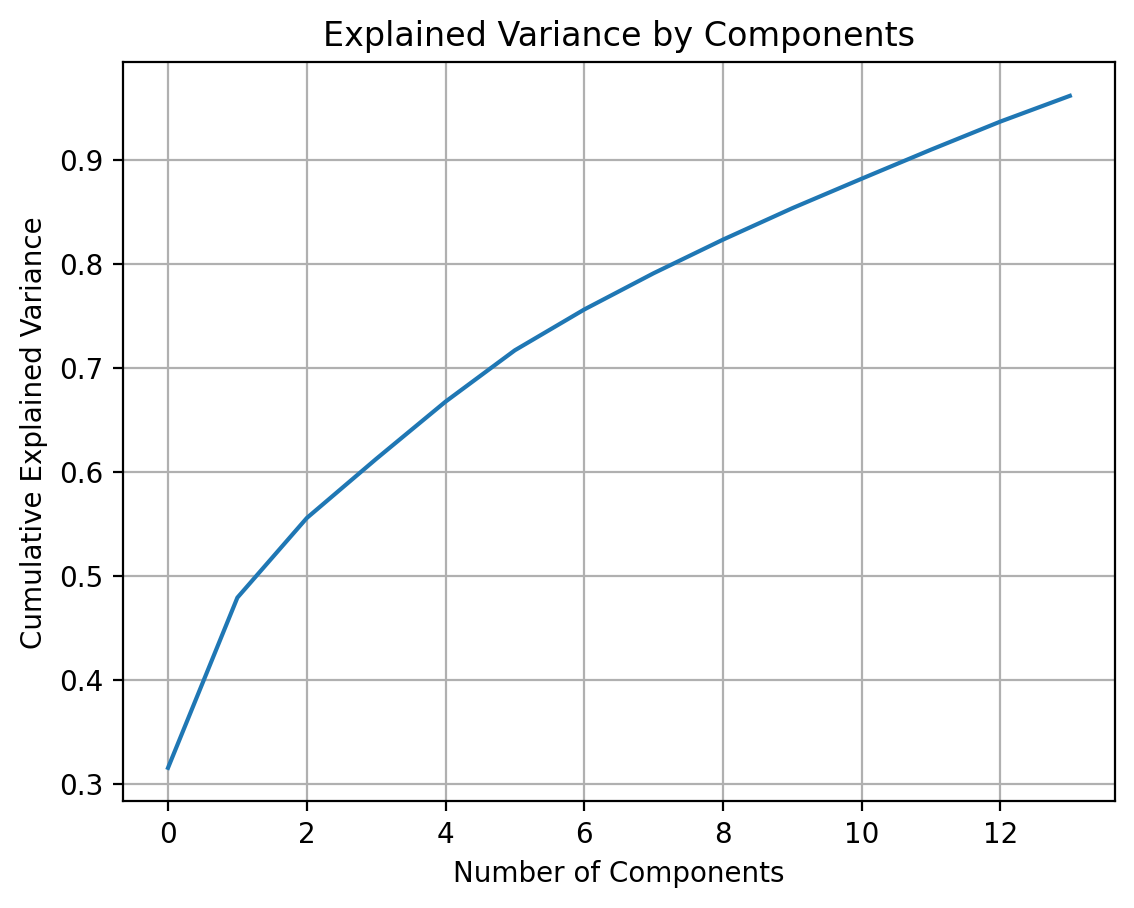

In [31]:
#to check which features are more important.
pca.fit(x_train_pca)

# Cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.grid()
plt.show()


In [64]:
# Create a BaggingClassifier with RandomForest as the base estimator
rf = RandomForestClassifier(n_estimators=30, criterion='gini',max_leaf_nodes=16,max_features=25,class_weight='balanced')
bagging_model = BaggingClassifier(estimator=rf, n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(x_train_pca, y_train)


BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_features=25,
                                                   max_leaf_nodes=16,
                                                   n_estimators=30),
                  n_estimators=50, random_state=42)

In [65]:
# Predict on the test set
y_pred = bagging_model.predict(x_test_pca)
# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.4f}")
class_report=classification_report(y_test,y_pred)
print('classification report for random_forest_with PCA\n', class_report)


Accuracy: 0.6842
classification report for random_forest_with PCA
               precision    recall  f1-score   support

           0       0.54      0.64      0.58       370
           1       0.27      0.67      0.38        97
           2       0.91      0.70      0.79       942

    accuracy                           0.68      1409
   macro avg       0.57      0.67      0.59      1409
weighted avg       0.77      0.68      0.71      1409



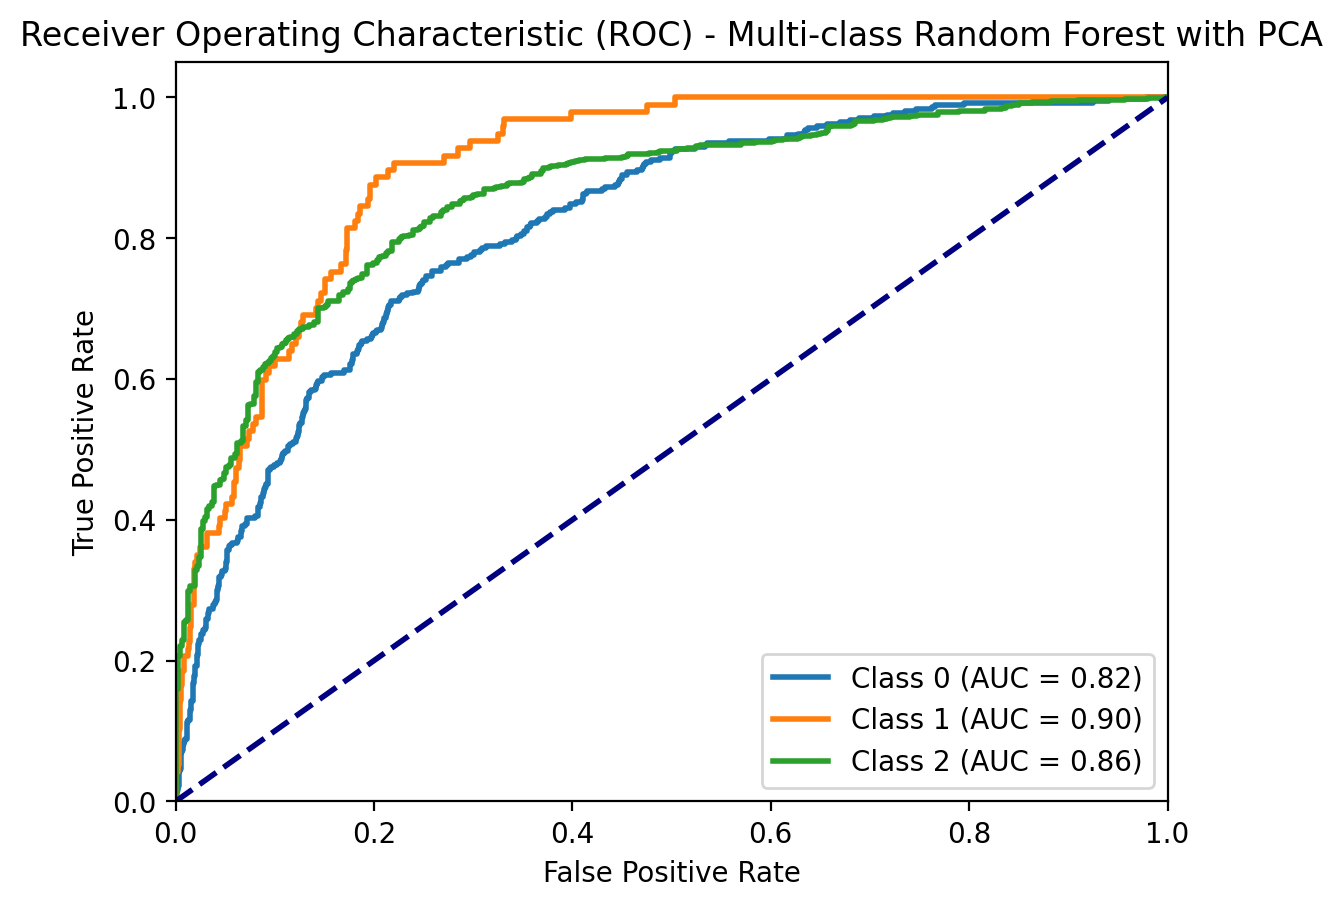

In [66]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Binarize the labels for multi-class classification
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # One-hot encoding for multi-class labels

# Get predicted probabilities
y_pred_prob = bagging_model.predict_proba(x_test_pca)  # Use predict_proba for multi-class

# For each class, plot the ROC curve
for i in range(len(lb.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc_rf = auc(fpr, tpr)
    
    # Plot the ROC curve for each class
    plt.plot(fpr, tpr, lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-class Random Forest with PCA')
plt.legend(loc="lower right")
plt.show()


In [112]:
# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes':[5,4,6],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,  # Number of iterations
    scoring='accuracy',  # Use accuracy as the metric
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(x_train_pca, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_pca)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': 6, 'max_depth': 20, 'criterion': 'gini'}
Best Cross-Validation Accuracy: 0.7500907011966885
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       370
           1       0.47      0.24      0.32        97
           2       0.85      0.87      0.86       942

    accuracy                           0.76      1409
   macro avg       0.63      0.57      0.59      1409
weighted avg       0.75      0.76      0.75      1409



In [43]:
# Create a BaggingClassifier with decision tree as the base estimator
dt = DecisionTreeClassifier(criterion='gini',min_samples_leaf=2,min_samples_split=10,max_leaf_nodes=6, max_depth= 20,splitter='best')
bagging_model2 = BaggingClassifier(estimator=dt, n_estimators=50, random_state=42)

# Train the model
bagging_model2.fit(x_train_pca, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                   max_leaf_nodes=6,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10),
                  n_estimators=50, random_state=42)

In [44]:
# Predict on the test set
y_pred = bagging_model2.predict(x_test_pca)
# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt:.4f}")
class_report=classification_report(y_test,y_pred)
print('classification report for Decision tree with PCA\n', class_report)



Accuracy: 0.7594
classification report for Decision tree with PCA
               precision    recall  f1-score   support

           0       0.59      0.61      0.60       370
           1       1.00      0.03      0.06        97
           2       0.82      0.89      0.86       942

    accuracy                           0.76      1409
   macro avg       0.80      0.51      0.51      1409
weighted avg       0.77      0.76      0.73      1409



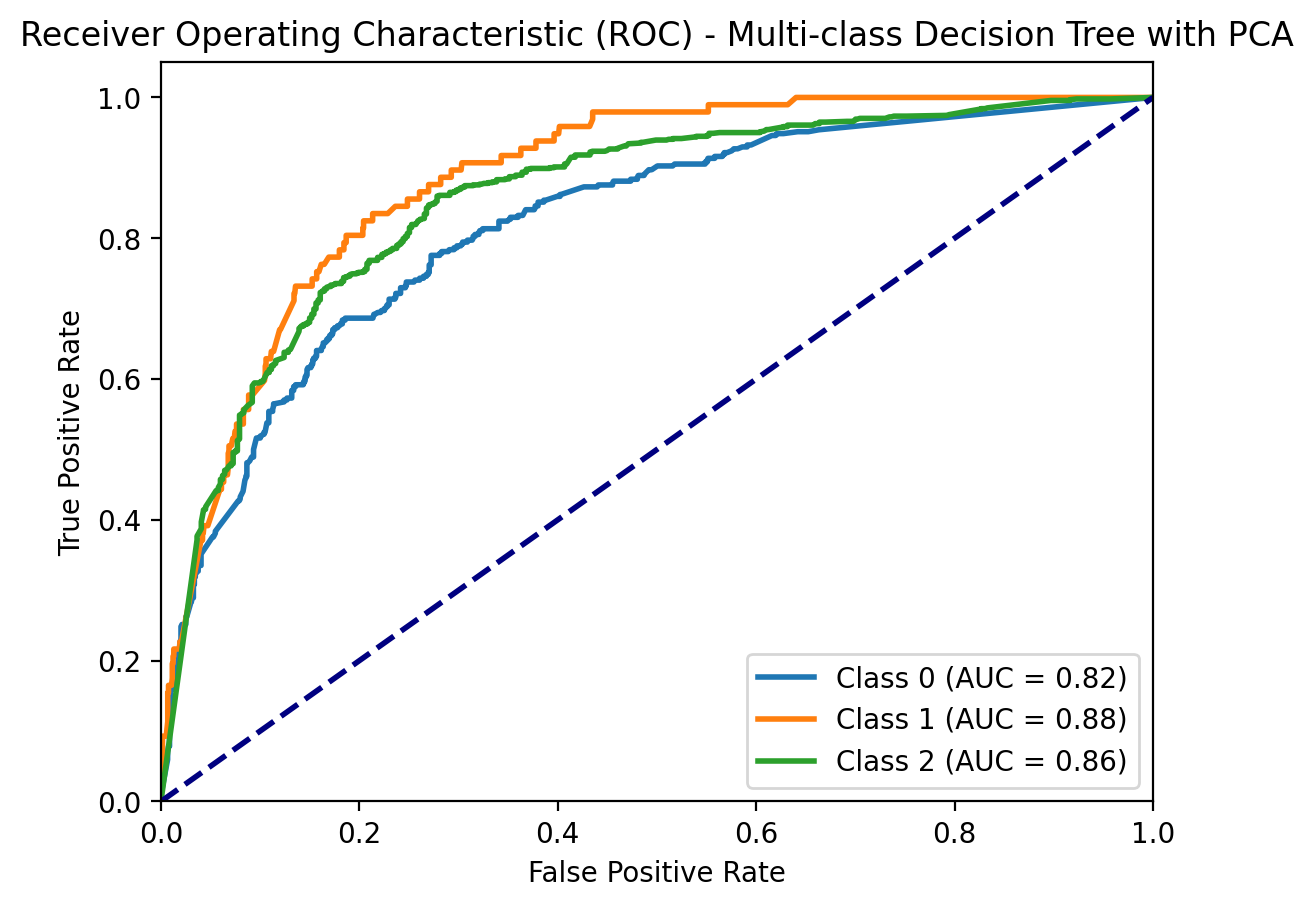

In [46]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Binarize the labels for multi-class classification
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # One-hot encoding for multi-class labels

# Get predicted probabilities
y_pred_prob = bagging_model2.predict_proba(x_test_pca)  # Use predict_proba for multi-class

# For each class, plot the ROC curve
for i in range(len(lb.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc_dt = auc(fpr, tpr)
    
    # Plot the ROC curve for each class
    plt.plot(fpr, tpr, lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc_dt:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-class Decision Tree with PCA')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Define the SVC model
svc = SVC(random_state=42)

# Define the hyperparameter grid
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'degree': [2, 3, 4],  # Degree of polynomial kernel (used if kernel='poly')
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(x_train_pca, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_pca)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [47]:
# Create a BaggingClassifier with SVM as the base estimator
svm = SVC(kernel='rbf',gamma='scale',degree=2,C=1)
bagging_model3 = BaggingClassifier(estimator=svm, n_estimators=50, random_state=42)

# Train the model
bagging_model3.fit(x_train_pca, y_train)

BaggingClassifier(estimator=SVC(C=1, degree=2), n_estimators=50,
                  random_state=42)

In [48]:
# Predict on the test set
y_pred = bagging_model3.predict(x_test_pca)
# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svm:.4f}")
class_report=classification_report(y_test,y_pred)
print('classification report for Support vector machine with PCA\n', class_report)


Accuracy: 0.7970
classification report for Support vector machine with PCA
               precision    recall  f1-score   support

           0       0.66      0.69      0.67       370
           1       0.53      0.26      0.35        97
           2       0.87      0.89      0.88       942

    accuracy                           0.80      1409
   macro avg       0.68      0.62      0.63      1409
weighted avg       0.79      0.80      0.79      1409



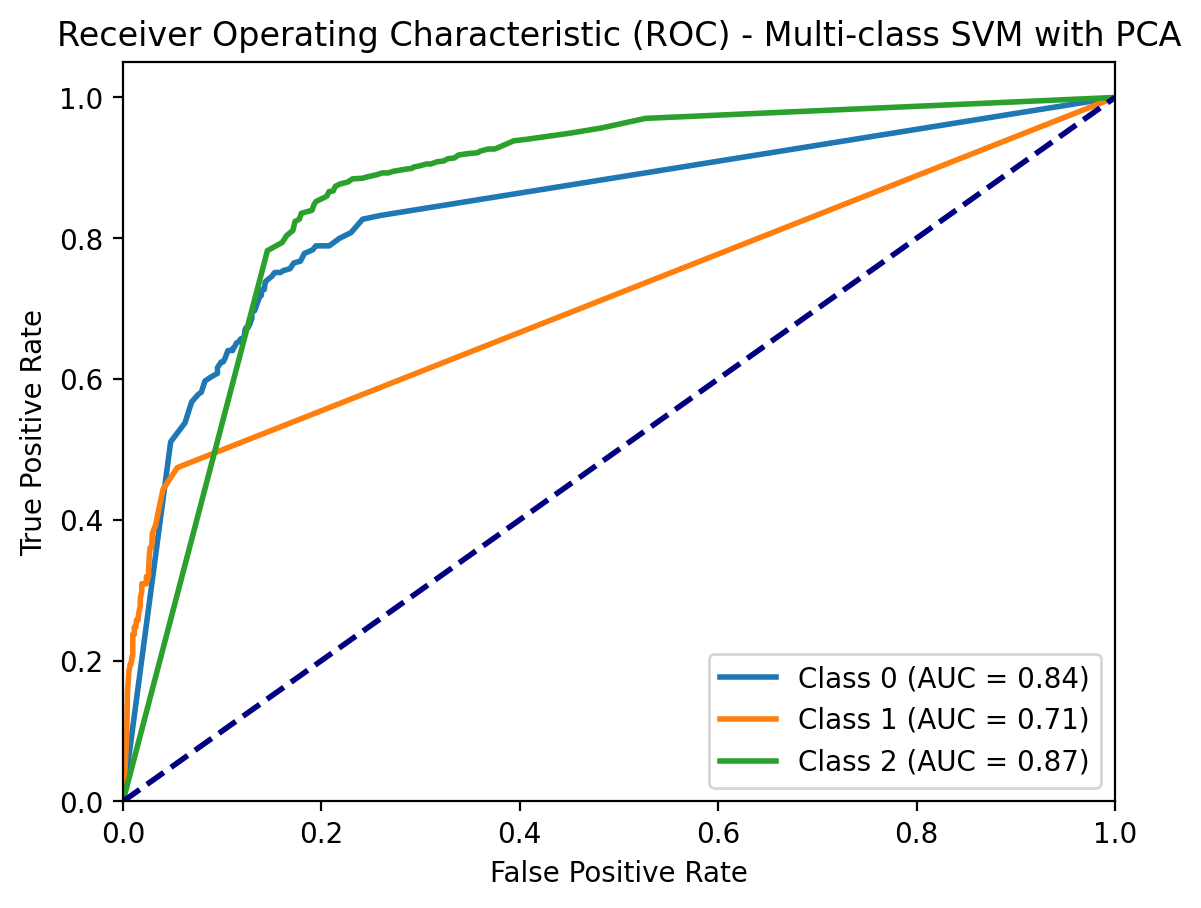

In [49]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Binarize the labels for multi-class classification
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # One-hot encoding for multi-class labels

# Get predicted probabilities
y_pred_prob = bagging_model3.predict_proba(x_test_pca)  # Use predict_proba for multi-class

# For each class, plot the ROC curve
for i in range(len(lb.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc_svm = auc(fpr, tpr)
    
    # Plot the ROC curve for each class
    plt.plot(fpr, tpr, lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-class SVM with PCA')
plt.legend(loc="lower right")
plt.show()


In [109]:
#Using LIght GBM model. Hyper parameter tuning.
lgbm_model = LGBMClassifier()

# Define the hyperparameters to tune
param_grid = {
    'num_leaves': [31, 50, 100],  # Number of leaves in a tree
    'max_depth': [-1, 10, 20],     # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'n_estimators': [50, 100, 200],  # Number of trees
    'boosting_type': ['gbdt', 'dart'],  # Boosting type
}

# Use GridSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the model
random_search.fit(x_train_pca, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best ROC AUC Score: {best_score}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 16
[LightGBM] [Info] Start training from score -1.324021
[LightGBM] [Info] Start training from score -2.758839
[LightGBM] [Info] Start training from score -0.399625
Best Parameters: {'num_leaves': 50, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.1, 'boosting_type': 'dart'}
Best ROC AUC Score: nan


In [37]:
#bagging pca and lightbgm.
lgbm_model = LGBMClassifier(boosting_type='dart', learning_rate= 0.1, force_col_wise=True,max_depth= -1, n_estimators= 200, num_leaves= 50)
bagging_model4 = BaggingClassifier(estimator=lgbm_model, n_estimators=50, random_state=42)

# Train the model
bagging_model4.fit(x_train_pca, y_train)

[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 16
[LightGBM] [Info] Start training from score -1.314725
[LightGBM] [Info] Start training from score -2.761644
[LightGBM] [Info] Start training from score -0.403072
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 16
[LightGBM] [Info] Start training from score -1.321357
[LightGBM] [Info] Start training from score -2.764457
[LightGBM] [Info] Start training from score -0.400154
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 16
[LightGBM] [Info] Start training from score -1.302899
[LightGBM] [Info] Start training from score -2.813529
[LightGBM] [Info] Start training from score -0.403072
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 16
[LightGBM]

BaggingClassifier(estimator=LGBMClassifier(boosting_type='dart',
                                           force_col_wise=True,
                                           n_estimators=200, num_leaves=50),
                  n_estimators=50, random_state=42)

In [38]:
# Predict on the test set
y_pred = bagging_model4.predict(x_test_pca)
# Evaluate accuracy
accuracy_lightbgm = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_lightbgm:.4f}")
class_report=classification_report(y_test,y_pred)
print('classification report for Support vector machine with PCA\n', class_report)

Accuracy: 0.8013
classification report for Support vector machine with PCA
               precision    recall  f1-score   support

           0       0.67      0.66      0.66       370
           1       0.56      0.33      0.42        97
           2       0.86      0.90      0.88       942

    accuracy                           0.80      1409
   macro avg       0.70      0.63      0.65      1409
weighted avg       0.79      0.80      0.79      1409



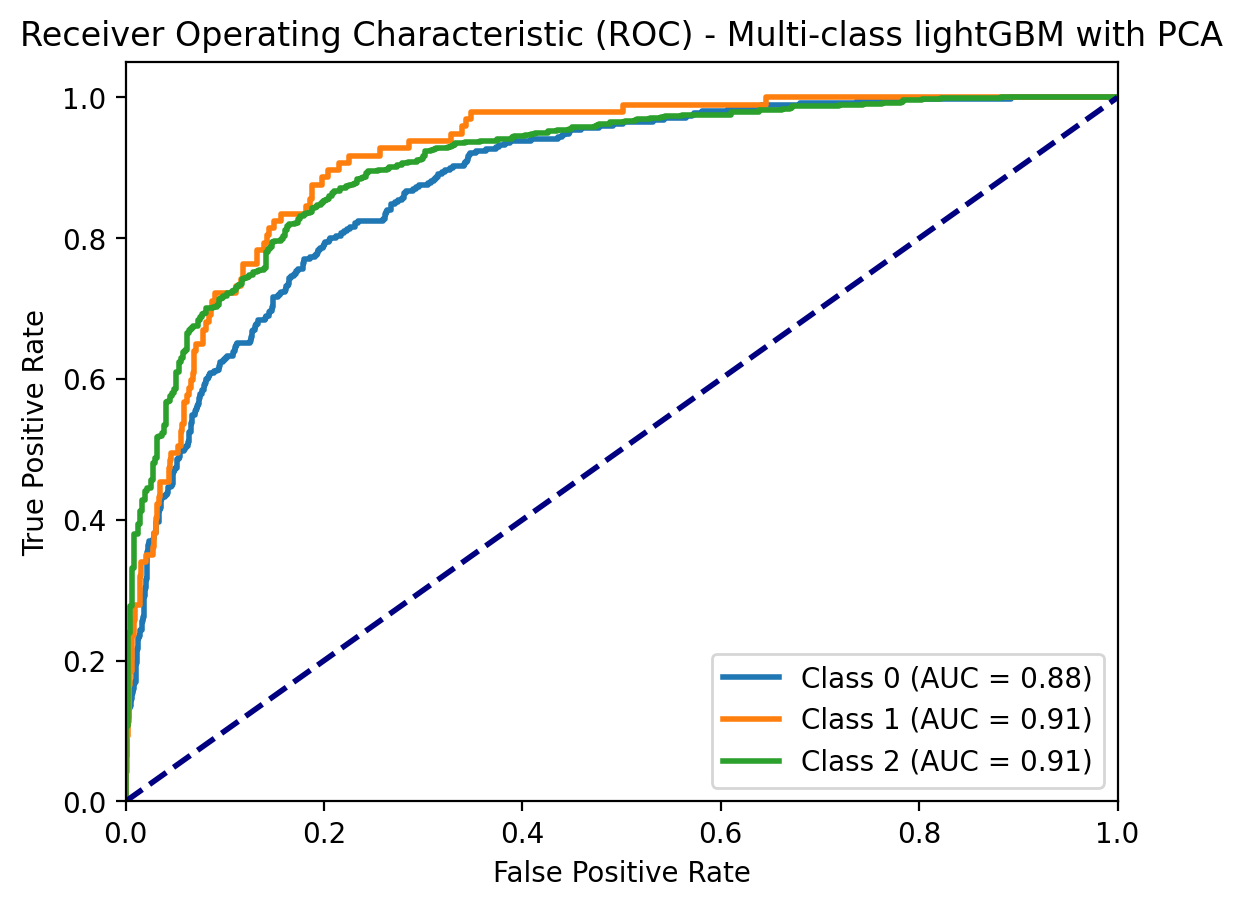

In [51]:
# Binarize the labels for multi-class classification
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # One-hot encoding for multi-class labels

# Get predicted probabilities
y_pred_prob = bagging_model4.predict_proba(x_test_pca)  # Use predict_proba for multi-class

# For each class, plot the ROC curve
for i in range(len(lb.classes_)):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc_light = auc(fpr, tpr)

    # Plot the ROC curve for each class
    plt.plot(fpr, tpr, lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc_light:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-class lightGBM with PCA')
plt.legend(loc="lower right")
plt.show()

In [52]:
conclusion=pd.DataFrame({'Models':['Random_Forest_PCA','Decision_Tree_PCA','SVM_PCA','Light_BGM_PCA'],
                         'Accuracy':[accuracy_rf,accuracy_dt,accuracy_svm,accuracy_lightbgm],
                         'AUC':[roc_auc_rf,roc_auc_dt,roc_auc_svm,roc_auc_light]})
conclusion

,Models,Accuracy,AUC
0,Random_Forest_PCA,0.791341,0.882031
1,Decision_Tree_PCA,0.759404,0.855050
2,SVM_PCA,0.797019,0.869104
3,Light_BGM_PCA,0.801278,0.906961


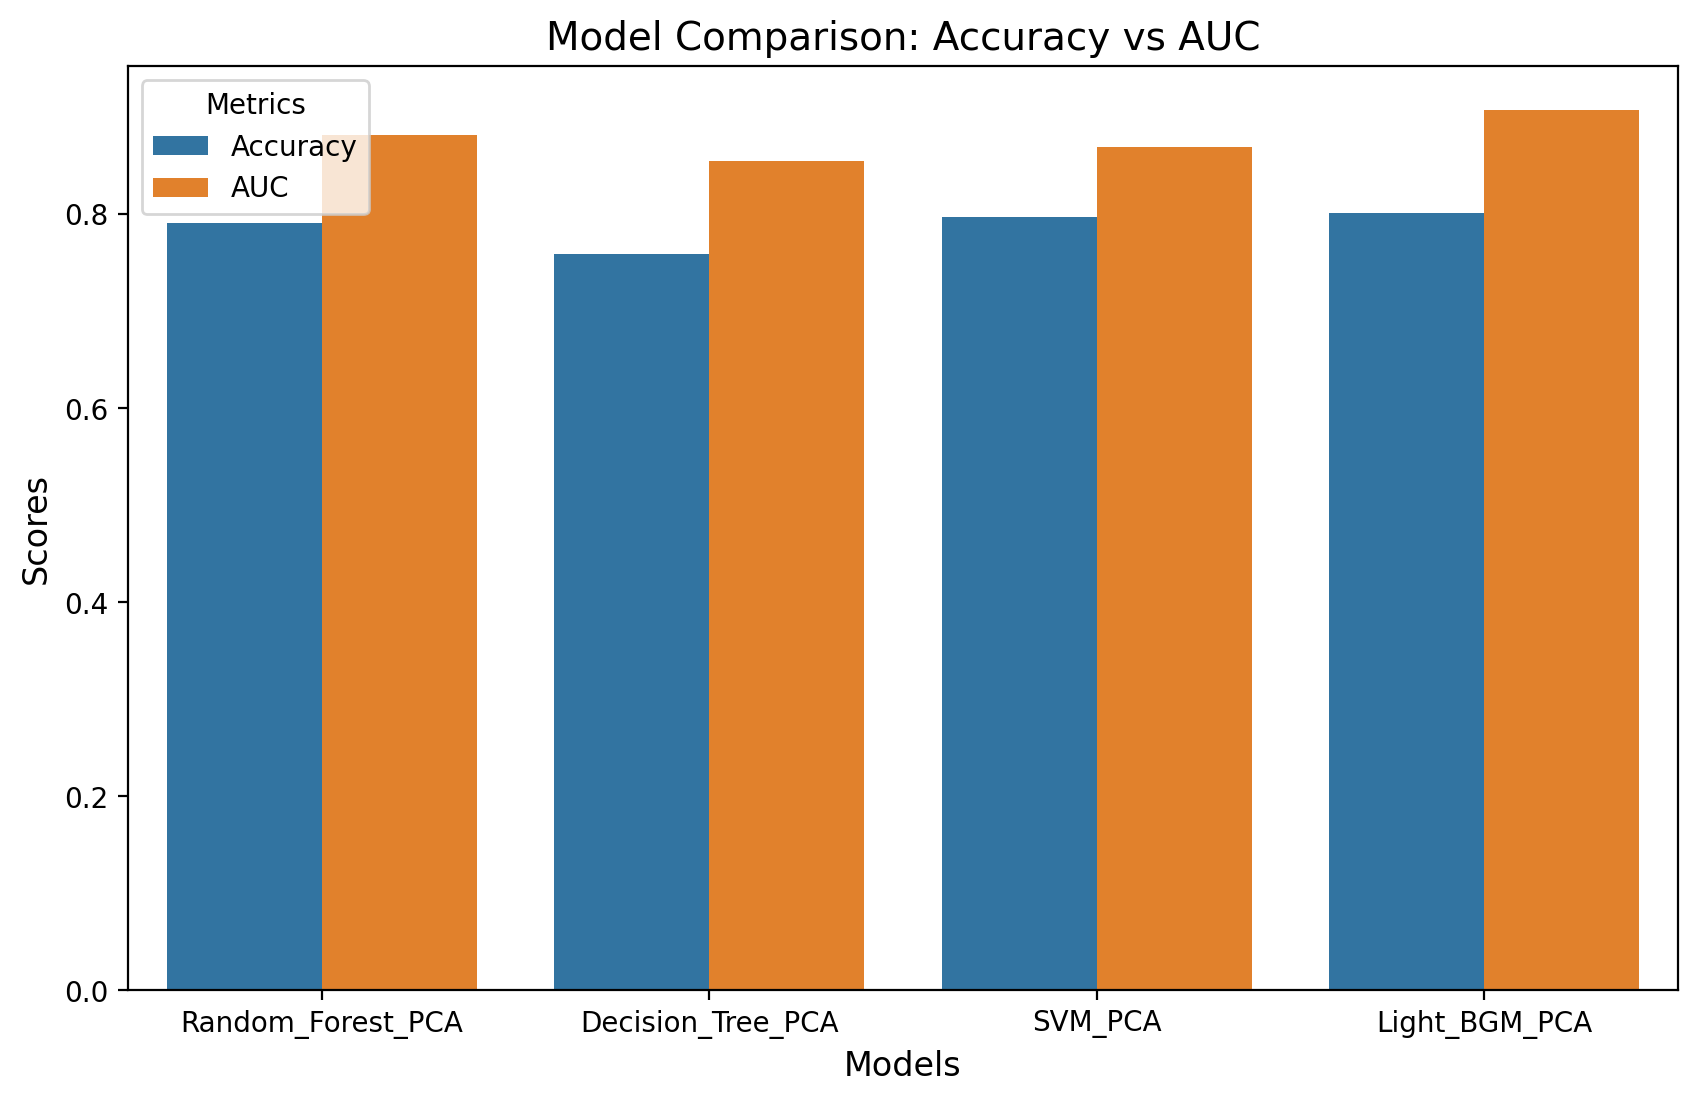

In [62]:
#melt the data to add hue to the plot and make comparision.
melted_data = conclusion.melt(id_vars='Models', var_name='Metric', value_name='Value')

# Set up the bar plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='Value', hue='Metric', data=melted_data)

# Add labels and title
plt.title('Model Comparison: Accuracy vs AUC', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.legend(title='Metrics',)
plt.show()

##Conclusion ## we consider AUC_ROC because in classification like churn analysis its important to note the low value of Recall.
RandomForest have an Recall of 0.18 And Accuracy of 0.78
Decision Tree Classifier have an Recall of 0.26 and Accuracy of 0.80
Support Vector Machine have an Recall of 0.30 and Accuracy of 0.79
##imbalanced dataset.
inorder to handle the imbalaced we use lightgbm model, so we consider AUC_ROC for our models accuracy.